# **Frequência e Medidas - Challenge**

O objetivo desse aula é que vocês consigam responder algumas perguntas através da análise de dados.

Os dados que deverão ser utilizado nesse script foram baixados do kaggle, e podem ser acessados através do link: https://www.kaggle.com/spscientist/students-performance-in-exams

Este conjunto de dados consiste nas notas obtidas pelos alunos em várias disciplinas e suas informações pessoais. 

Variáveis:
*   ***gender*** - gênero do aluno
*   ***race/ethnicity*** - raça/etnia dos alunos
*   ***parental level of education*** - grau de escolaridade dos pais
*   ***lunch*** - tipo de almoço
*   ***test preparation course*** - indica se fez curso preparatório
*   ***math score*** - nota na prova de matematica
*   ***reading score*** - nota na prova de leitura
*   ***writing score*** - nota na prova de escrita

Os dados são arquivos em .csv.

**OBS**: Não se esqueça de consultar o material da aula passada para eventuais dúvidas sobre o código que deverá ser utilizado.

**OBS2**: Se possível, responda as perguntas com análise descritiva e gráfica.



### Leia a base de dados e faça uma análise inicial.

Por exemplo, verifique o tamanho da base de dados e o tipo das variáveis.

In [2]:
# importação de pacotes
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings("ignore")

In [3]:
# lendo a base de dados
data = pd.read_csv("../dados/StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
data.shape

(1000, 8)

In [7]:
data.dtypes # tipo de dados

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Idenfique as variáveis qualitativas e quantitativas.

In [8]:
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
# quantitativas = math score, reading score, writing score
# qualitativas = gender, race, lunch 

### Alguma variável precisa ser alterada ou criada? Faça as alterações que julgar necessária.

### Verifique a quantidade de alunos em cada grupo racial/étnico.

In [29]:
data_raca = data.groupby("race/ethnicity")["race/ethnicity"].count()
data_raca

race/ethnicity
group A     89
group B    190
group C    319
group D    262
group E    140
Name: race/ethnicity, dtype: int64

<AxesSubplot:ylabel='race/ethnicity'>

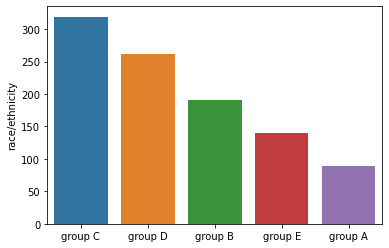

In [31]:
sns.barplot(x=data['race/ethnicity'].value_counts().index, y=data['race/ethnicity'].value_counts())

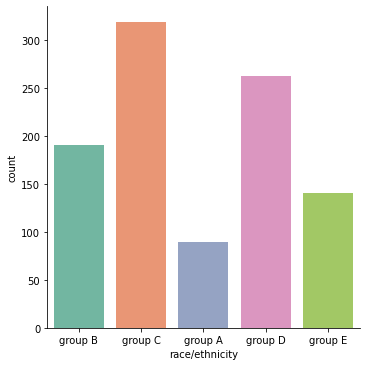

In [24]:
sns.catplot(x="race/ethnicity", kind="count", palette="Set2",data=data)

### Qual a quantidade de alunos de cada gênero? Existem mais alunos do gênero masculino ou feminino?

In [21]:
data_gender = data.groupby("gender")["gender"].count()
data_gender

gender
female    518
male      482
Name: gender, dtype: int64

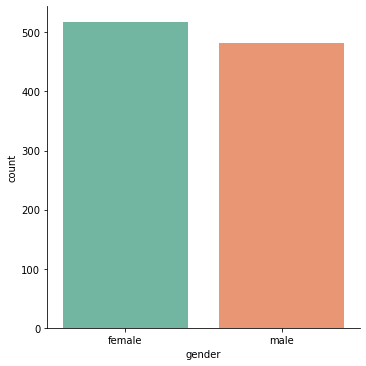

In [25]:
sns.catplot(x="gender", kind="count", palette="Set2",data=data)

### Analise as notas de matemática dos alunos de forma mais completa possível.

Dica: Identifique o tipo de variável e faça todas análises que você sabe que pode ser aplicado para esse tipo de variável. Por exemplo, se for uma variável quantitativa calcule a média, mediana, quartis, etc. Já se for uma variável qualitativa faça a tabela de fequência, moda, etc.

OBS: Faça também análises gráficas.

### Qual a nota média de matemática dos alunos segundo o grau de escolaridade dos pais? Faça a mesma análise para as notas de leitura e escrita.

In [32]:
data.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().round(2)

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.88,70.93,69.90
bachelor's degree,69.39,73.00,73.38
high school,62.14,64.70,62.45
master's degree,69.75,75.37,75.68
some college,67.13,69.46,68.84
some high school,63.50,66.94,64.89


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

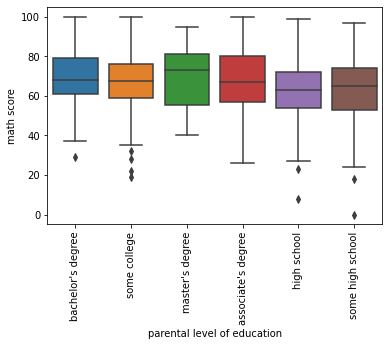

In [37]:
sns.boxplot(x ='parental level of education', y = 'math score', data=data)
plt.xticks(rotation =90)

### Verifique gráficamente a relação da nota de leitura e de escrita.

<AxesSubplot:xlabel='writing score', ylabel='reading score'>

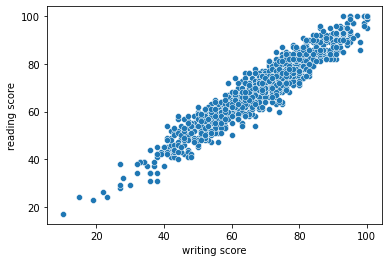

In [38]:
sns.scatterplot( data = data, x = "writing score", y = "reading score")

### Faça alguma outra análise que você ache pertinente.